# Deep Learning with TensorFlow and Keras: Course End Projects

https://drive.google.com/drive/folders/1kwwdDkY5QYqpS_OwB7DOm1GJ7Mox92nb

Carllos Watts-Nogueira

Due: Jul 12 by 12:59am

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, classification_report, roc_curve, roc_auc_score

from sklearn.utils import resample

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import AUC

from keras.callbacks import EarlyStopping

# 1. and 2. Load dataset / Check for null values in the dataset

In [2]:
# Load the Data Dic
df_dd = pd.read_csv('Data_Dictionary.csv')
df_dd

,Column no.,Variable Name,Description
0,1,SK_ID_CURR,Unique identifier for each client.
1,2,TARGET,"Whether the loan was repaid (1 for yes, 0 for ..."
2,3,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol..."
3,4,CODE_GENDER,Gender of the applicant.
4,5,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).
...,...,...,...
115,116,AMT_REQ_CREDIT_BUREAU_DAY,Number of inquiries to the Credit Bureau in th...
116,117,AMT_REQ_CREDIT_BUREAU_WEEK,Number of inquiries to the Credit Bureau in th...
117,118,AMT_REQ_CREDIT_BUREAU_MON,Number of inquiries to the Credit Bureau in th...
118,119,AMT_REQ_CREDIT_BUREAU_QRT,Number of inquiries to the Credit Bureau in th...


In [3]:
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Column no.     120 non-null    int64 
 1   Variable Name  120 non-null    object
 2   Description    120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [4]:
# Load dataset
df = pd.read_csv('loan_data.csv')

In [5]:
# copy df
df_main_cpy = df.copy(deep=True)

In [6]:
df_main_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [10]:
# dtype
df.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64
AMT_REQ_CREDIT_BUREAU_WEEK,float64
AMT_REQ_CREDIT_BUREAU_MON,float64
AMT_REQ_CREDIT_BUREAU_QRT,float64


In [11]:
# new df
df_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,
    'Missing %': (df.isnull().mean().values * 100).round(2)
})

# mix by column name
summary_df = pd.merge(df_info, df_dd, how='left', left_on='Column Name', right_on='Variable Name')

# Select columns, rename
summary_df = summary_df[['Column Name', 'Description', 'Data Type', 'Missing Values', 'Missing %']]

In [12]:
# show all rows
pd.set_option('display.max_rows', None)

# print
summary_df

,Column Name,Description,Data Type,Missing Values,Missing %
0,SK_ID_CURR,Unique identifier for each client.,int64,0,0.00
1,TARGET,"Whether the loan was repaid (1 for yes, 0 for ...",int64,0,0.00
2,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol...",object,0,0.00
3,CODE_GENDER,Gender of the applicant.,object,0,0.00
4,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).,object,0,0.00
5,FLAG_OWN_REALTY,Whether the applicant owns a house or flat (Ye...,object,0,0.00
6,CNT_CHILDREN,Number of children the applicant has.,int64,0,0.00
7,AMT_INCOME_TOTAL,Total income of the applicant.,float64,0,0.00
8,AMT_CREDIT,Total credit amount of the loan.,float64,0,0.00
9,AMT_ANNUITY,Loan annuity (monthly payment).,float64,12,0.00


In [13]:
summary_df[summary_df['Data Type'] == 'object']

,Column Name,Description,Data Type,Missing Values,Missing %
2,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol...",object,0,0.00
3,CODE_GENDER,Gender of the applicant.,object,0,0.00
4,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).,object,0,0.00
5,FLAG_OWN_REALTY,Whether the applicant owns a house or flat (Ye...,object,0,0.00
11,NAME_TYPE_SUITE,Who was accompanying the client when applying ...,object,1292,0.42
12,NAME_INCOME_TYPE,"Income category of the applicant (e.g., Workin...",object,0,0.00
13,NAME_EDUCATION_TYPE,Education level of the applicant.,object,0,0.00
14,NAME_FAMILY_STATUS,"Family status of the applicant (e.g., Married,...",object,0,0.00
15,NAME_HOUSING_TYPE,"Housing situation of the applicant (e.g., Rent...",object,0,0.00
28,OCCUPATION_TYPE,Occupation type of the applicant.,object,96391,31.35


In [14]:
# Cria uma cópia do dataframe apenas com as colunas do tipo 'object'
object_summary = summary_df[summary_df['Data Type'].astype(str) == 'object'].copy()

# Adiciona a nova coluna com os valores únicos de cada coluna
object_summary['Unique Values'] = object_summary['Column Name'].apply(lambda col: df[col].dropna().unique().tolist())

In [15]:
object_summary

,Column Name,Description,Data Type,Missing Values,Missing %,Unique Values
2,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol...",object,0,0.00,"[Cash loans, Revolving loans]"
3,CODE_GENDER,Gender of the applicant.,object,0,0.00,"[M, F, XNA]"
4,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).,object,0,0.00,"[N, Y]"
5,FLAG_OWN_REALTY,Whether the applicant owns a house or flat (Ye...,object,0,0.00,"[Y, N]"
11,NAME_TYPE_SUITE,Who was accompanying the client when applying ...,object,1292,0.42,"[Unaccompanied, Family, Spouse, partner, Child..."
12,NAME_INCOME_TYPE,"Income category of the applicant (e.g., Workin...",object,0,0.00,"[Working, State servant, Commercial associate,..."
13,NAME_EDUCATION_TYPE,Education level of the applicant.,object,0,0.00,"[Secondary / secondary special, Higher educati..."
14,NAME_FAMILY_STATUS,"Family status of the applicant (e.g., Married,...",object,0,0.00,"[Single / not married, Married, Civil marriage..."
15,NAME_HOUSING_TYPE,"Housing situation of the applicant (e.g., Rent...",object,0,0.00,"[House / apartment, Rented apartment, With par..."
28,OCCUPATION_TYPE,Occupation type of the applicant.,object,96391,31.35,"[Laborers, Core staff, Accountants, Managers, ..."


In [17]:
summary_df[summary_df['Missing %'] > 50].sort_values('Missing %', ascending=False)

,Column Name,Description,Data Type,Missing Values,Missing %
48,COMMONAREA_AVG,Normalized average value of common area.,float64,214865,69.87
76,COMMONAREA_MEDI,Median value of common area.,float64,214865,69.87
62,COMMONAREA_MODE,Mode value of common area.,float64,214865,69.87
56,NONLIVINGAPARTMENTS_AVG,Normalized average value of non-living apartme...,float64,213514,69.43
70,NONLIVINGAPARTMENTS_MODE,Mode value of non-living apartments.,float64,213514,69.43
84,NONLIVINGAPARTMENTS_MEDI,Median value of non-living apartments.,float64,213514,69.43
86,FONDKAPREMONT_MODE,Mode of the apartment fund.,object,210295,68.39
54,LIVINGAPARTMENTS_AVG,Normalized average value of the living apartme...,float64,210199,68.35
68,LIVINGAPARTMENTS_MODE,Mode value of the living apartments.,float64,210199,68.35
82,LIVINGAPARTMENTS_MEDI,Median value of the living apartments.,float64,210199,68.35


In [18]:
print(summary_df['Data Type'].unique())

[dtype('int64') dtype('O') dtype('float64')]


In [19]:
summary_df[summary_df['Data Type'].astype(str).isin(['int64', 'float64'])]

,Column Name,Description,Data Type,Missing Values,Missing %
0,SK_ID_CURR,Unique identifier for each client.,int64,0,0.00
1,TARGET,"Whether the loan was repaid (1 for yes, 0 for ...",int64,0,0.00
6,CNT_CHILDREN,Number of children the applicant has.,int64,0,0.00
7,AMT_INCOME_TOTAL,Total income of the applicant.,float64,0,0.00
8,AMT_CREDIT,Total credit amount of the loan.,float64,0,0.00
9,AMT_ANNUITY,Loan annuity (monthly payment).,float64,12,0.00
10,AMT_GOODS_PRICE,Price of the goods for which the loan is taken.,float64,278,0.09
16,REGION_POPULATION_RELATIVE,Normalized population of the region where the ...,float64,0,0.00
17,DAYS_BIRTH,Age of the client in days (from birth to the a...,int64,0,0.00
18,DAYS_EMPLOYED,How long the applicant has been employed (in d...,int64,0,0.00


In [20]:
nulls = df.isnull().sum()
print(nulls[nulls > 0])

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

In [21]:
medium_missing = nulls[(nulls > 0) & (nulls < 41519)]
print(medium_missing)

AMT_ANNUITY                   12
AMT_GOODS_PRICE              278
NAME_TYPE_SUITE             1292
CNT_FAM_MEMBERS                2
EXT_SOURCE_2                 660
OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
DAYS_LAST_PHONE_CHANGE         1
dtype: int64


In [22]:
high_missing = nulls[nulls > 41519]
print(high_missing)

OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE           

In [23]:
# copy df
df_main = df.copy(deep=True)

# Data Cleaning + Feature Engineering

In [24]:
# Variables with few missing values (up to 1%)

# Simple imputation for low-missing variables
low_nulls = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
             'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
             'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
             'CNT_FAM_MEMBERS']

for col in low_nulls:
    df[col] = df[col].fillna(df[col].median())

In [26]:
# variables with moderate missing rates (10-20%)

# Impute EXT_SOURCE columns with mean
ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for col in ext_sources:
    df[col] = df[col].fillna(df[col].mean())

# Create missing flags for bureau-related features
bureau_cols = [col for col in df.columns if 'AMT_REQ_CREDIT_BUREAU' in col]
for col in bureau_cols:
    df[col + '_missing_flag'] = df[col].isnull().astype(int)
    df[col] = df[col].fillna(0)

In [27]:
# Structural/physical variables (~50–70% missing)

# Identify numeric columns with more than 50% missing values
high_missing_numeric = [
    col for col in df.select_dtypes(include=['number']).columns
    if df[col].isnull().mean() > 0.5
]

# Efficient creation of missing flags
missing_flags = {
    col + '_missing_flag': df[col].isnull().astype(int)
    for col in high_missing_numeric
}

# Concatenate all flags into the main DataFrame
df = pd.concat([df, pd.DataFrame(missing_flags)], axis=1)

# Impute missing values using the median
for col in high_missing_numeric:
    df[col] = df[col].fillna(df[col].median())

In [28]:
# Normalize strings: categorical columns with no missing values
categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
for col in categorical_cols:
    df[col] = df[col].str.lower().str.strip()

# Impute mode for columns with low missingness
light_nulls = [
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
    'ORGANIZATION_TYPE'
]
for col in light_nulls:
    df[col] = df[col].fillna(df[col].mode()[0])

# Impute 'Unknown' for categorical columns with high missingness
heavy_nulls = [
    'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
]
for col in heavy_nulls:
    df[col + '_missing_flag'] = df[col].isnull().astype(int)
    df[col] = df[col].fillna('Unknown')

In [29]:
# new df
df_infotw = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,
    'Missing %': (df.isnull().mean().values * 100).round(2)
})

# mix dic by colum name
summary_df = pd.merge(df_infotw, df_dd, how='left', left_on='Column Name', right_on='Variable Name')

# rename
summary_df = summary_df[['Column Name', 'Description', 'Data Type', 'Missing Values', 'Missing %']]

In [30]:
# all rows
pd.set_option('display.max_rows', None)

#
summary_df

,Column Name,Description,Data Type,Missing Values,Missing %
0,SK_ID_CURR,Unique identifier for each client.,int64,0,0.00
1,TARGET,"Whether the loan was repaid (1 for yes, 0 for ...",int64,0,0.00
2,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol...",object,0,0.00
3,CODE_GENDER,Gender of the applicant.,object,0,0.00
4,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).,object,0,0.00
5,FLAG_OWN_REALTY,Whether the applicant owns a house or flat (Ye...,object,0,0.00
6,CNT_CHILDREN,Number of children the applicant has.,int64,0,0.00
7,AMT_INCOME_TOTAL,Total income of the applicant.,float64,0,0.00
8,AMT_CREDIT,Total credit amount of the loan.,float64,0,0.00
9,AMT_ANNUITY,Loan annuity (monthly payment).,float64,0,0.00


In [35]:
# Identify columns where nulls are still present
null_summary = df.isnull().sum()
remaining_nulls = null_summary[null_summary > 0]
print(remaining_nulls)

Series([], dtype: int64)


In [32]:
low_nulls = df.columns[df.isnull().sum() <= 2].tolist()

for col in low_nulls:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [33]:
# List of relevant columns to treat
relevant_nulls = [
    'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
    'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
    'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI',
    'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_CONTRACT_TYPE'  # example non-numeric
]

# Create missing flags efficiently
missing_flags = {
    col + '_missing_flag': df[col].isnull().astype(int)
    for col in relevant_nulls
}

# Add flags to the main DataFrame
df = pd.concat([df, pd.DataFrame(missing_flags)], axis=1)

# Impute based on column type
for col in relevant_nulls:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode(dropna=True)[0])

In [34]:
print("Remaining nulls:", df.isnull().sum().sum())

Remaining nulls: 0


In [36]:
#
df_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Missing Values': df.isnull().sum().values,
    'Missing %': (df.isnull().mean().values * 100).round(2)
})

#
summary_df = pd.merge(df_info, df_dd, how='left', left_on='Column Name', right_on='Variable Name')

#
summary_df = summary_df[['Column Name', 'Description', 'Data Type', 'Missing Values', 'Missing %']]

#
pd.set_option('display.max_rows', None)

#
summary_df

,Column Name,Description,Data Type,Missing Values,Missing %
0,SK_ID_CURR,Unique identifier for each client.,int64,0,0.0
1,TARGET,"Whether the loan was repaid (1 for yes, 0 for ...",int64,0,0.0
2,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol...",object,0,0.0
3,CODE_GENDER,Gender of the applicant.,object,0,0.0
4,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).,object,0,0.0
5,FLAG_OWN_REALTY,Whether the applicant owns a house or flat (Ye...,object,0,0.0
6,CNT_CHILDREN,Number of children the applicant has.,int64,0,0.0
7,AMT_INCOME_TOTAL,Total income of the applicant.,float64,0,0.0
8,AMT_CREDIT,Total credit amount of the loan.,float64,0,0.0
9,AMT_ANNUITY,Loan annuity (monthly payment).,float64,0,0.0


In [37]:
df = df.drop(columns=['SK_ID_CURR'])

In [38]:
# Drop duplicate or malformed flag columns
columns_to_drop = [col for col in df.columns if 'missing_flag_missing_flag' in col]
df = df.drop(columns=columns_to_drop)

In [39]:
missing_percentage = df.isnull().mean() * 100
missing_percentage

,0
TARGET,0.0
NAME_CONTRACT_TYPE,0.0
CODE_GENDER,0.0
FLAG_OWN_CAR,0.0
FLAG_OWN_REALTY,0.0
CNT_CHILDREN,0.0
AMT_INCOME_TOTAL,0.0
AMT_CREDIT,0.0
AMT_ANNUITY,0.0
AMT_GOODS_PRICE,0.0


In [15]:
# df.dropna(inplace=True)

In [40]:
df.info()

# is ok I deleted 298.909 is ok? or better dropna() columns more afected with nulls and latter dropna rows?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 181 entries, TARGET to NAME_CONTRACT_TYPE_missing_flag
dtypes: float64(65), int64(100), object(16)
memory usage: 424.6+ MB


In [41]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'YEARS_BEGINEXPLUATATION_MODE_missing_flag',
       'FLOORSMAX_MODE_missing_flag',
       'YEARS_BEGINEXPLUATATION_MEDI_missing_flag',
       'FLOORSMAX_MEDI_missing_flag', 'TOTALAREA_MODE_missing_flag',
       'OBS_30_CNT_SOCIAL_CIRCLE_missing_flag',
       'DEF_30_CNT_SOCIAL_CIRCLE_missing_flag',
       'OBS_60_CNT_SOCIAL_CIRCLE_missing_flag',
       'DEF_60_CNT_SOCIAL_CIRCLE_missing_flag',
       'NAME_CONTRACT_TYPE_missing_flag'],
      dtype='object', length=181)

# 3. Print the percentage of default to a payer of the dataset for the TARGET column

In [42]:
# Option A, with mean()
# default_rate = df['TARGET'].mean()
# print(f"Default percentage: {default_rate * 100:.2f}%")

In [43]:
# Option B, with value_counts and normalize
default_rate = df['TARGET'].value_counts(normalize=True)[1] * 100
print(f"Default percentage: {default_rate:.2f}%")

Default percentage: 8.07%


# 4. Balance the dataset if the data is imbalanced

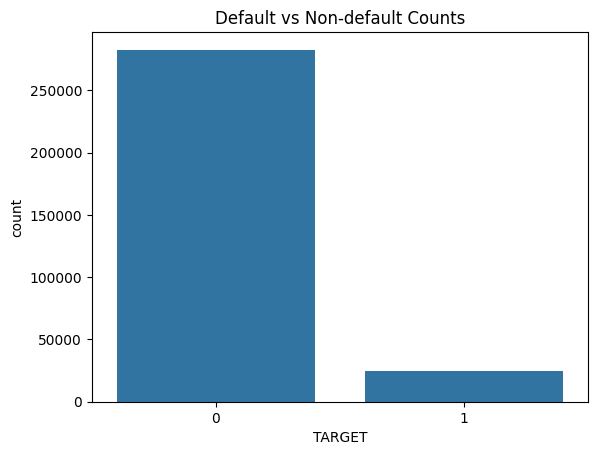

In [45]:
# data is imbalanced?
sns.countplot(x='TARGET', data=df)
plt.title('Default vs Non-default Counts')
plt.show()

# If the data is more "0" non-defaults than "1" defaults, means the dataset is imbalanced, we need balanced.

In [ ]:
# A) Balance the dataset
# sample() from pandas

# default_df = df[df['TARGET'] == 1]
# non_default_df = df[df['TARGET'] == 0].sample(n=len(default_df), random_state=42)

# balanced_df = pd.concat([default_df, non_default_df])

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

In [ ]:
# print("Balanced data shape:", balanced_df.shape)

In [46]:
# B) Balance the dataset
#  resample() from sklearn.utils

# Separate classes
non_default = df[df['TARGET'] == 0]
default = df[df['TARGET'] == 1]

# Balance by undersampling the majority class
non_default_sample = resample(non_default,
                              replace=False,
                              n_samples=len(default),
                              random_state=42)

balanced_df = pd.concat([non_default_sample, default])
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

In [47]:
print("Balanced data shape:", balanced_df.shape)

Balanced data shape: (49650, 181)


In [48]:
balanced_df.info()

# only 1052 rows, is too low data?

<class 'pandas.core.frame.DataFrame'>
Index: 49650 entries, 201622 to 307509
Columns: 181 entries, TARGET to NAME_CONTRACT_TYPE_missing_flag
dtypes: float64(65), int64(100), object(16)
memory usage: 68.9+ MB


In [49]:
#
default_rate_after_balan = balanced_df['TARGET'].value_counts(normalize=True)[1] * 100
print(f"Default percentage after balancing: {default_rate_after_balan:.2f}%")

Default percentage after balancing: 50.00%


# 5. Plot the balanced or imbalanced data

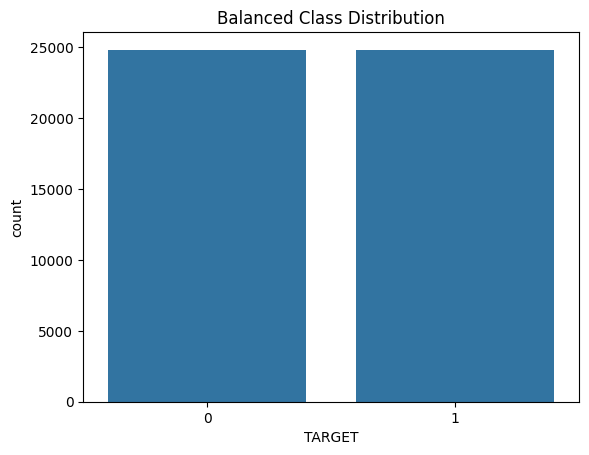

In [50]:
# Plot the dataset balanced
sns.countplot(x='TARGET', data=balanced_df)
plt.title('Balanced Class Distribution')
plt.show()

# 6. Encode the columns that are required for the model

In [54]:
# Encode categorical features
# A) labelEncoder

# for col in balanced_df.select_dtypes(include=['object']).columns:
#     balanced_df[col] = LabelEncoder().fit_transform(balanced_df[col])

In [51]:
# Encode categorical features
# B) get_dummies

# One-hot encode categorical variables
df_encoded = pd.get_dummies(balanced_df, drop_first=True)

In [60]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49650 entries, 201622 to 307509
Columns: 293 entries, TARGET to EMERGENCYSTATE_MODE_Yes
dtypes: bool(128), float64(65), int64(100)
memory usage: 68.9 MB


In [52]:
# Split features and target
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. scaler features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Build deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # reduction overfitting
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binaria
])

# Compile model - AUC
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)

early_stop = EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stop]
)

# Evaluate model
y_pred_probs = model.predict(X_test_scaled).ravel()
y_pred_class = (y_pred_probs > 0.5).astype(int)

Epoch 1/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6251 - auc: 0.6670 - loss: 0.6525 - val_accuracy: 0.6755 - val_auc: 0.7360 - val_loss: 0.6059
Epoch 2/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6779 - auc: 0.7369 - loss: 0.6038 - val_accuracy: 0.6767 - val_auc: 0.7378 - val_loss: 0.6049
Epoch 3/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6796 - auc: 0.7426 - loss: 0.5994 - val_accuracy: 0.6811 - val_auc: 0.7434 - val_loss: 0.6000
Epoch 4/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6822 - auc: 0.7480 - loss: 0.5939 - val_accuracy: 0.6804 - val_auc: 0.7417 - val_loss: 0.6002
Epoch 5/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6843 - auc: 0.7489 - loss: 0.5925 - val_accuracy: 0.6767 - val_auc: 0.7413 - val_loss: 0.6001
Epoch 6/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6897 - auc: 0.7541 - loss: 0.5886 - val_accuracy: 0.6807 - val_auc: 0.7412 - val_loss: 0.6005
Epoch 7/20
1242/1242 ━━━━━━━

In [54]:
# Metrics
accuracy = accuracy_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_probs)

In [56]:
print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {recall:.2f}")
print(f"Area Under the ROC Curve (AUC): {roc_auc:.2f}") #ROC-AUC Score

Model Evaluation:
Accuracy: 0.68
Sensitivity (Recall): 0.67
Area Under the ROC Curve (AUC): 0.74


In [55]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

Confusion Matrix:
[[3422 1531]
 [1636 3341]]


In [57]:
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      4953
           1       0.69      0.67      0.68      4977

    accuracy                           0.68      9930
   macro avg       0.68      0.68      0.68      9930
weighted avg       0.68      0.68      0.68      9930



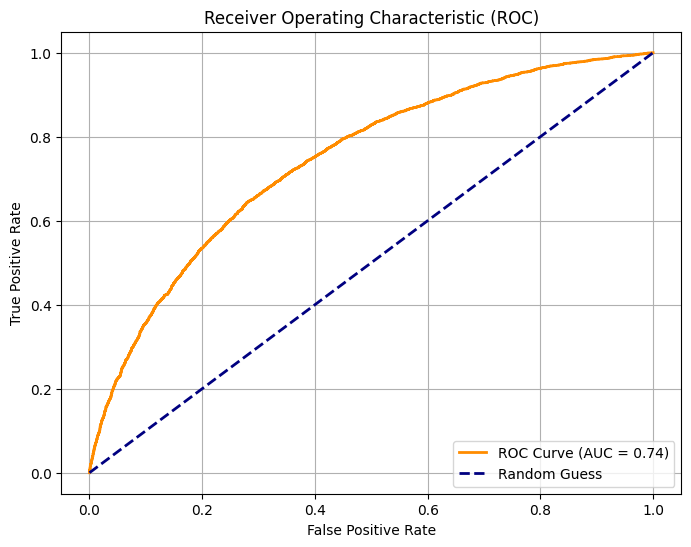

In [59]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Final Report

**Project Overview**

I worked with a dataset consisting of 307,511 records and 122 variables. My main goal was to apply a strategic and conservative data cleaning process—one that avoided losing valuable information through methods like dropna().
Through selective imputations, binary flag creation, and categorical standardization, I reshaped the dataset to contain 181 columns while preserving all original rows.

**Data Cleaning & Feature Engineering - Strategies Applied**

1. Numerical Variables with Low Missingness (≤ 1%)
- Examples: CNT_CHILDREN, AMT_CREDIT, DAYS_BIRTH
- Action: Imputation using median
- Reasoning: Preserves distribution and reduces the impact of outliers

2. Moderate Missingness (~10–20%)
- Key Features: EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3
- Action: Imputation using mean
- Reasoning: Features are normalized between 0 and 1, so the mean makes intuitive sense

3. Bureau Variables (AMT_REQ_CREDIT_BUREAU_*)
- Action: Impute with 0 + create *_missing_flag
- Reasoning: Missing values may reflect real behavioral patterns

4. High Missingness (>50%)
- Examples: COMMONAREA_MEDI, OWN_CAR_AGE
- Action: Median imputation + binary flags
- Reasoning: Absence itself might hold predictive value

5. Categorical Features with Light Missingness
- Examples: NAME_TYPE_SUITE, ORGANIZATION_TYPE
- Action: Imputation with mode
- Reasoning: Keeps category distributions intact

6. Categorical Features with Heavy Missingness
- Examples: OCCUPATION_TYPE, WALLSMATERIAL_MODE
- Action: Imputation using "unknown" + creation of missing flags
- Reasoning: Helps treat missingness as a potentially meaningful signal

7. String Standardization
- Examples: CODE_GENDER, FLAG_OWN_CAR
- Action: Applied .str.lower().strip()
- Reasoning: Prevents duplication during encoding

Additional Feature Engineering

| *_missing_flag | Allows model to learn from explicit absence |

| Dropping SK_ID_CURR | Removed due to lack of predictive value |








**Data Balancing Strategy**

To address class imbalance (only 8.07% defaults), I used undersampling with resample() from sklearn.utils.

```
non_default = df[df['TARGET'] == 0]
default = df[df['TARGET'] == 1]

non_default_sample = resample(
    non_default,
    replace=False,
    n_samples=len(default),
    random_state=42
)

balanced_df = pd.concat([non_default_sample, default])
```

Outcome

- Final shape: (49,650, 181)
- Data types: float64 (65), int64 (100), object (16)

Encoding:

```
df_encoded = pd.get_dummies(balanced_df, drop_first=True)
```

Outcome

- 49650 entries
- Columns: 293





**Modeling – Deep Learning**

**Architecture**


```
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
```
- Optimizer: Adam
- Loss Function: Binary Crossentropy
- Metrics: Accuracy, AUC


**Training**

- 20 epochs with EarlyStopping on val_auc
- Best performance around epoch 8
- Stable validation AUC ≈ 0.743

Final Evaluation
| Metric | Value |

| Accuracy | 0.68 |

| Recall | 0.67 |

| AUC ROC | 0.74 |

| Threshold | 0.5 |

**Confusion Matrix**

[[3422 1531]

 [1636 3341]]



**Classification Report**
| Class | Precision | Recall | F1-score | Support |

| 0 | 0.68 | 0.69 | 0.68 | 4953 |

| 1 | 0.69 | 0.67 | 0.68 | 4977 |

| Macro Avg | 0.68 | 0.68 | 0.68 | 9930 |

| Weighted Avg | 0.68 | 0.68 | 0.68 | 9930 |


**Conclusion**

This project led me to question the choices I made: 

was the approach of selective imputation and explicit flag creation truly the most appropriate for handling missing data? 

Could there be more effective practices out there?

How can we be guided toward a more robust and generalizable solution, especially in the face of severe class imbalance?

The results, when compared to the earlier strategy of dropping incomplete records, showed significant improvement—but does this alone validate the method as reliable and replicable?

Can this work be considered solid within the standards of data science best practices, or are there gaps that still need to be addressed?


